# SUV Prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
suv_data = pd.read_csv('suv_data.csv')
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
len(suv_data)

400

# Analyse a data

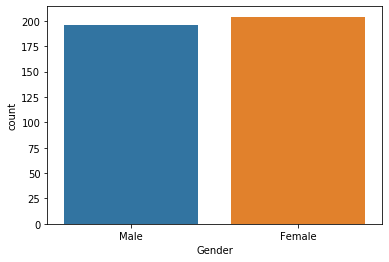

In [5]:
sns.countplot(x = 'Gender', data = suv_data)

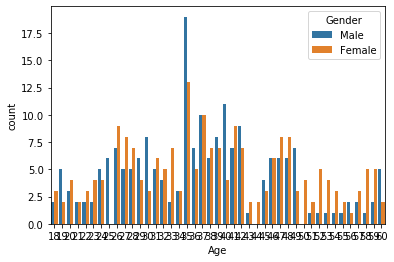

In [11]:
sns.countplot(x = 'Age',hue='Gender', data = suv_data)

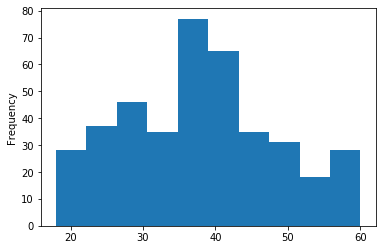

In [13]:
suv_data['Age'].plot.hist()

# Data wrangling (Data Cleaning)

In [14]:
suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [16]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
suv_data.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


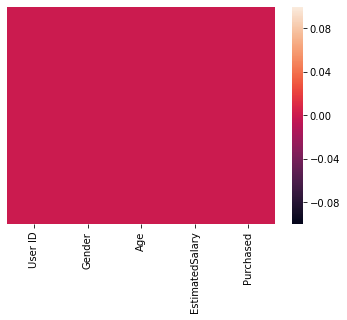

In [18]:
sns.heatmap(suv_data.isnull(), yticklabels= False)

In [24]:
X = suv_data.iloc[:,[2,3]].values # in this the (:) all rows will be selected and [2,3] age and salary column will be selected
y = suv_data.iloc[:,4].values  # dependent variable will be a purchsed column

In [25]:
#from sklearn.cross_validation import train_test_split
#above module was privously used but now it is there in below model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\Suraj Yadav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85